# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [5]:
dataset_train.tail(2)

,Date,Open,High,Low,Close,Volume
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [6]:
training_set[0:2]

array([[325.25],
       [331.27]])

In [7]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


### Feature Scaling
With RNNs, a Sigmoid output function, it's recommended (by Hadelin) to use Normalization.

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled[0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [10]:
training_set_scaled.shape

(1258, 1)

### Creating a data structure with 60 timesteps and 1 output
60 steps => 60 financial days => 3 months
Use 3 months to predict the price

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [12]:
training_set_scaled[60-60:60, 0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

```
i = 60
previous_prices = X_train = [60-60:60, 0] = [0:60, 0]      # from 0 to 59 with 
target_price = y_train = 60

i = 61
previous_prices = X_train = [61-60:61, 0] = [1:60, 0]
target_price = y_train = 61

...

i = 1257
previous_prices = X_train = [1257-60:1257, 0] = [1197:1257, 0]
target_price = y_train = 1257

```



In [13]:
X_train = []
y_train = []
for i in range(60, 1258):
    # 0 => take the 1st element in the array of 60 prices
    # because there is only one column and we want to
    # extract a 1D array
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(1198, 60)

### Reshaping
TODO: Undertsnad RNNs input shape

In [15]:
X_train = X_train.reshape (X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN
**TODO: Iindicator** We could add an indicator. For example, the stock price of another company might affect Google, so it would be a relevant indicator.

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [17]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation
### Adding a third LSTM layer and some Dropout regularisation
50 neurons - input_shape correspond to the price (second element) and the indicator (last element)
20% = 10 neurons will be dropped out

In [18]:
# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50, return_sequences = True))

regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation
We don't return any sequence in the penultimate layer.

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(units = 1))

### Compiling the RNN
Mean_squared_error since we are predicting prices (Regression).

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 126ms/step - loss: 0.0369
Epoch 2/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0045
Epoch 13/100

## Part 3 - Making the predictions and visualising the results
**Important:** What we are going to predict the prices of January, 2017. To do so, we get the prices 60 days before (which correspond to 3 months: from October till December).
That is why we use ```train_set_length - 60```.

**Important:** Shape should be (n, 1) not (n,)

#### Getting the test set prices
 Test set contains prices of <b style="color:red">January 2017</b>

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
real_stock_price.shape

(20, 1)

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)


#### Now we get the prices 60 days before 2017

In [46]:
print('Full dataset', len(dataset_total))
print('dataset_test', len(dataset_test))
# print(len(dataset_total) - len(dataset_test) - 60)
print('dataset_train', len(dataset_train) - 60)

Full dataset 1278
dataset_test 20
dataset_train 1198


In [60]:
sixty_days_before_january_2017 = len(dataset_train) - 60
# From the total dataset,
# we start from 60 days beofre Janaury 2017 to the last day of January 2017
inputs = dataset_total[sixty_days_before_january_2017:].values

In [61]:
print('inputs.shape', inputs.shape)
inputs = inputs.reshape(-1, 1)
print('inputs.shape', inputs.shape)

inputs.shape (80,)
inputs.shape (80, 1)


#### Scale test values

In [62]:
# Scale test prices
print('Inputs beofre scaling', inputs[0:5])
inputs = sc.transform(inputs)
print('Inputs scaled', inputs[0:5])

1/1 [==============================] - 2s 2s/step


#### There are 20 days in January 2017.
* Get the 60 previous prices for each of those 20 days. test set is all the values 
* E.g: (TODO: verify) For January, 5 get prices from December, 5 till January 4 
* E.g: For January, 6 get prices from December, 6 till January  

i = 60
inputs[60-60:60] = [0:60]

i = 61
inputs[61-60:61] = [1:61]

i = 80
inputs[80-61:80] = [19:80]

In [77]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
print('X_test', X_test.shape)

X_test (20, 60)


In [78]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print('X_test.shape', X_test.shape)

X_test.shape (20, 60, 1)


In [69]:
X_test[1:3]

array([[[0.93113327],
        [0.92750577],
        [0.94415507],
        [0.93876032],
        [0.93403527],
        [0.93483518],
        [0.9313937 ],
        [0.94636878],
        [0.96569685],
        [0.97510976],
        [0.95966962],
        [0.97808617],
        [1.        ],
        [0.98076494],
        [0.97083116],
        [0.98450406],
        [0.96054394],
        [0.9371419 ],
        [0.92841729],
        [0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0

#### predict the test prices and unscale it

In [80]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 61ms/step


### Visualising the results

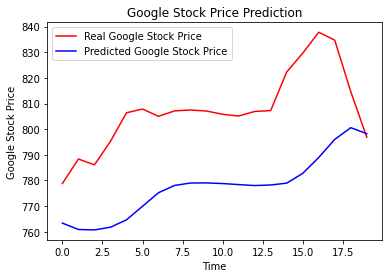

In [87]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
# plt.ylim(600,900)
plt.legend()
plt.show()

In [90]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse/ np.mean(real_stock_price))

0.039704165042855115
